In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [4]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Load the data from the CSV file
df = pd.read_csv("lending_data.csv")

# Review the DataFrame
# Display the first few rows of the dataset to understand its structure

df

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Separate the y variable (labels) - Replace 'target' with the actual column name for your target
y = df['loan_status']  # Replace 'target' with your actual target column name

# Separate the X variable (features) - All columns except for the target column
X = df.drop('loan_status', axis=1)  # Replace 'target' with your actual target column name

# Now X contains the features and y contains the labels (target variable)

# Check the shapes of X and y to verify the separation
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (labels): {y.shape}")

Shape of X (features): (77536, 7)
Shape of y (labels): (77536,)


In [8]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [9]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Verify the target values 

y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [33]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logreg_model = LogisticRegression(random_state=1)

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fit the model on scaled data
logreg_model = LogisticRegression(random_state=1)
# logreg_model.fit(X_train_scaled, y_train)
logreg_model.fit(X_train, y_train)

C:\Users\krios\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [34]:
# Make a prediction using the testing data
predictions = logreg_model.predict(X_test)

# Print the predicted values
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
# Score the model
print(f"Training Data Score: {logreg_model.score(X_train, y_train)}")
print(f"Testing Data Score: {logreg_model.score(X_test, y_test)}")

Training Data Score: 0.9929323153115972
Testing Data Score: 0.9924680148576145


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [36]:
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Print the balanced accuracy score
print(f"Balanced Accuracy: {balanced_acc}")

Balanced Accuracy: 0.5


A balanced accuracy score of 0.5 indicates that the model is performing no better than random guessing. 

In [37]:
from sklearn.metrics import confusion_matrix

# Confirm y_pred is obtained from the logistic regression model
y_pred = logreg_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(conf_matrix)



[[18655   110]
 [   36   583]]


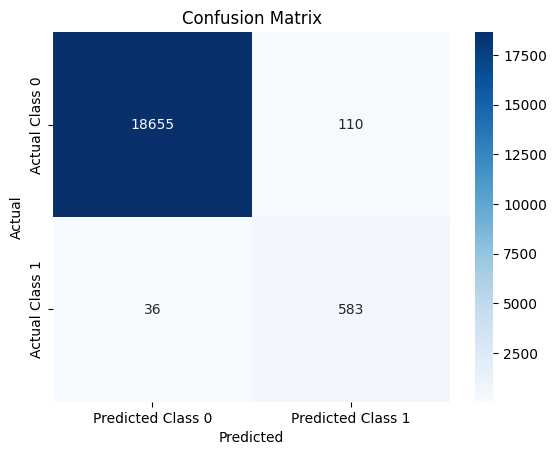

In [38]:
# Generate a confusion matrix for the model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
# Print the classification report for the model
from sklearn.metrics import classification_report

# Confirm y_pred is obtained from the logistic regression model
y_pred = logreg_model.predict(X_test)

# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 


# Logistic Regression Model Performance:
 - Precision:
 * For 0 (healthy loans): Precision is 1.00, meaning that 100% of the loans predicted as healthy (0) were actually healthy. This is a perfect score.
 * For 1 (high-risk loans): Precision is 0.84, meaning that 84% of the loans predicted as high-risk (1) were actually high-risk. While this is fairly high, there is still some room for improvement.
- Recall:
 * For 0 (healthy loans): Recall is 0.99, meaning that 99% of the actual healthy loans were correctly identified as healthy. This is an excellent recall score.
 * For 1 (high-risk loans): Recall is 0.94, meaning that 94% of the actual high-risk loans were correctly identified as high-risk. This is also a very good recall score, though slightly lower than for the healthy loans.
- F1-score:
 * For 0 (healthy loans): The F1-score is 1.00, indicating perfect balance between precision and recall for healthy loans.
 * For 1 (high-risk loans): The F1-score is 0.89, which indicates a good balance between precision and recall for high-risk loans, though slightly lower than the perfect score for healthy loans.
 
 - Overall Performance:
 * The accuracy of the model is 0.99 (99%), meaning the model correctly predicted 99% of the test data, which is excellent.
 * The macro average F1-score is 0.94, which indicates a good overall performance across both classes.
 * The weighted average F1-score is 0.99, reflecting the model’s strong performance, particularly due to the dominance of the healthy loans class.

- Conclusion:
 * The model performs exceptionally well for predicting healthy loans (0), with perfect precision and F1-score.
 * It also performs very well for predicting high-risk loans (1), with a precision of 0.84, recall of 0.94, and an F1-score of 0.89. This suggests that while the model is good at identifying high-risk loans, there is still a small percentage of misclassifications or false positives among them.
 * In summary, the logistic regression model is highly effective at predicting both classes, with strong performance for healthy loans and good performance for high-risk loans. The model is reliable, but there could still be some small improvements in predicting high-risk loans more accurately (e.g. improving precision slightly).

---